#  Covid-19 trend forecasting in LSTM model

In this jupyter notebook, we will assess the ability of LSTM model in Covid-19 forecasting. 

This forecasting work based on the WHO Coronavirus Disease (COVID-19) Dashboard (27/09/2020)
https://covid19.who.int/

There are 4 countries for our target, including Australia, China, Italy and US

Previously we have complete the data extraction from original sources, and now we are going to load these dataset and do further processing.

# 1. proprecessing

## 1.1 Data loading

In [1]:
import IPython
import IPython.display
from tensorflow import keras

In [2]:
import os,glob
import pandas as pd
import numpy as np
data_all = pd.read_csv(r"D:\Download\COVID19\WHO-COVID-19-global-data.csv", index_col=None)

In [3]:
data_all.columns = data_all.columns.str.replace(' ', '')

In [4]:
data_all.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      63215 non-null  object
 1   Country_code       62946 non-null  object
 2   Country            63215 non-null  object
 3   WHO_region         63215 non-null  object
 4   New_cases          63215 non-null  int64 
 5   Cumulative_cases   63215 non-null  int64 
 6   New_deaths         63215 non-null  int64 
 7   Cumulative_deaths  63215 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [6]:
data_all.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,63215.000000,6.321500e+04,63215.000000,63215.000000
mean,517.771810,3.651005e+04,15.680202,1474.109990
std,3788.950602,2.725697e+05,108.257858,9350.207733
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,1.450000e+02,0.000000,2.000000
75%,57.000000,3.906000e+03,1.000000,78.000000
max,97894.000000,6.960152e+06,6409.000000,202478.000000


In [7]:
site_cn = data_all[['Date_reported',"New_cases"]][data_all.Country == "China"]
site_cn_group =  site_cn.groupby(['Date_reported'],as_index=False).sum()
site_cn_group.rename(columns={"New_cases":"NC_cn_24h"}, inplace=True)
site_cn_group

,Date_reported,NC_cn_24h
0,2020-01-03,0
1,2020-01-04,1
2,2020-01-05,0
3,2020-01-06,3
4,2020-01-07,0
...,...,...
264,2020-09-23,18
265,2020-09-24,10
266,2020-09-25,15
267,2020-09-26,18


In [8]:
site_au = data_all[['Date_reported',"New_cases"]][data_all.Country == "Australia"]
site_au_group =  site_au.groupby(['Date_reported'],as_index=False).sum()
site_au_group.rename(columns={"New_cases":"NC_au_24h"}, inplace=True)
site_au_group

,Date_reported,NC_au_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,30
265,2020-09-24,31
266,2020-09-25,10
267,2020-09-26,17


In [9]:
site_it = data_all[['Date_reported',"New_cases"]][data_all.Country == "Italy"]
site_it_group =  site_it.groupby(['Date_reported'],as_index=False).sum()
site_it_group.rename(columns={"New_cases":"NC_it_24h"}, inplace=True)
site_it_group

,Date_reported,NC_it_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,1391
265,2020-09-24,1640
266,2020-09-25,1786
267,2020-09-26,1912


In [10]:
site_us = data_all[['Date_reported',"New_cases"]][data_all.Country == "United States of America"]
site_us_group =  site_us.groupby(['Date_reported'],as_index=False).sum()
site_us_group.rename(columns={"New_cases":"NC_us_24h"}, inplace=True)
site_us_group

,Date_reported,NC_us_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,39145
265,2020-09-24,49176
266,2020-09-25,40043
267,2020-09-26,41254


In [12]:
all_data_df = site_cn_group.merge(site_au_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_it_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_us_group, left_on='Date_reported', right_on='Date_reported')

In [13]:
all_data_df

,Date_reported,NC_cn_24h,NC_au_24h,NC_it_24h,NC_us_24h
0,2020-01-03,0,0,0,0
1,2020-01-04,1,0,0,0
2,2020-01-05,0,0,0,0
3,2020-01-06,3,0,0,0
4,2020-01-07,0,0,0,0
...,...,...,...,...,...
264,2020-09-23,18,30,1391,39145
265,2020-09-24,10,31,1640,49176
266,2020-09-25,15,10,1786,40043
267,2020-09-26,18,17,1912,41254


In [14]:
all_data_df.to_csv(r'D:\Download\COVID19\data\WHO-COVID-19-global-data.csv', index = False, header=True)

Before the process, we need to make sure the data has frequency attributes.

## 1.2 frequence check

In [15]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

~~~~~~~~~~~~
Next we want to extract date time

~~~~~~~~~~~~

In [16]:
df_time = all_data_df.copy()
date_time = pd.to_datetime(df_time.pop('Date_reported'), format='%Y-%m-%d %H:%M:%S')

In [17]:
date_time

0     2020-01-03
1     2020-01-04
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
264   2020-09-23
265   2020-09-24
266   2020-09-25
267   2020-09-26
268   2020-09-27
Name: Date_reported, Length: 269, dtype: datetime64[ns]

In [18]:
df_time.head()

,NC_cn_24h,NC_au_24h,NC_it_24h,NC_us_24h
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,3,0,0,0
4,0,0,0,0


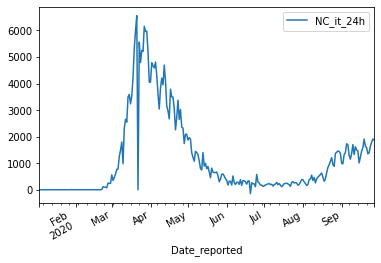

In [19]:
plot_cols = ['NC_it_24h']
plot_features = df_time[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

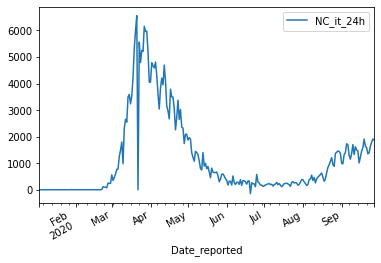

In [20]:
plot_features = df_time[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True)

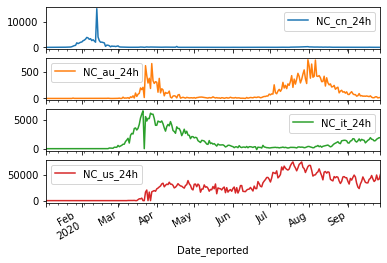

In [21]:
plot_cols = ['NC_cn_24h','NC_au_24h','NC_it_24h','NC_us_24h']
plot_features = df_time[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

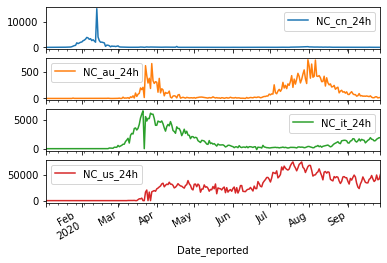

In [22]:
plot_features = df_time[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True)

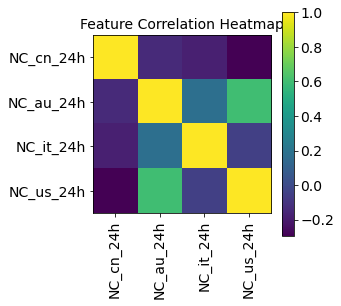

In [23]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df_time[plot_cols])

# 2. Problem formulation and modelling

## Forecasting the trend of death and infection cases of COVID-19

### Data preparation

# Italy

In [24]:
selected_features = ['NC_it_24h']
date_time_key = "Date_reported"
features = all_data_df[selected_features]
features.index = all_data_df["Date_reported"]
features.head()

,NC_it_24h
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0


### Normalization and data set split

We will have 70% days as training,20% days as validation.

Note the data is **not** being randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.



In [25]:
train_fraction = 0.7
test_fraction = 0.9

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

In [26]:
def normalize(data, train_split):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean)
    print(data_std)
    return (data - data_mean) / data_std


In [27]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

[1287.]
[1722.24976566]


,0
0,-0.747278
1,-0.747278
2,-0.747278
3,-0.747278
4,-0.747278


In [28]:
n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

val case until: 188 test case until:  242


# test_data, LearningRate 0.05, Epochs 1000

In [29]:
step = 1
past = 25
future = 5
learning_rate = 0.05
batch_size = 30
epochs = 1000

In [30]:
start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

start: 30  end: 218


In [31]:
x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


In [32]:
sequence_length = int(past / step)
print(sequence_length)

25


In [33]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


In [34]:
val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)

start: 188  end: 242


In [35]:

temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

array([[-0.63521565],
       [-0.62302229],
       [-0.58702287],
       [-0.63811883],
       [-0.61140958],
       [-0.64915091],
       [-0.68108588],
       [-0.65321536],
       [-0.61373212],
       [-0.61315148],
       [-0.60270004],
       [-0.62069975],
       [-0.63695756],
       [-0.67295698],
       [-0.58470033],
       [-0.56960379],
       [-0.60095813],
       [-0.58818414],
       [-0.59979686],
       [-0.64973154],
       [-0.62998992],
       [-0.58005524],
       [-0.52547547],
       [-0.52721737],
       [-0.57599079],
       [-0.60908703],
       [-0.65495727],
       [-0.63695756],
       [-0.5243142 ],
       [-0.51444339],
       [-0.42676737],
       [-0.54579772],
       [-0.47844396],
       [-0.59689368],
       [-0.50805639],
       [-0.47089569],
       [-0.44418644],
       [-0.41399338],
       [-0.38205841],
       [-0.47031506],
       [-0.56147489],
       [-0.51444339],
       [-0.37451014],
       [-0.25954424],
       [-0.1974162 ],
       [-0

In [36]:
y_val

,0
218,-0.426767
219,-0.545798
220,-0.478444
221,-0.596894
222,-0.508056
223,-0.470896
224,-0.444186
225,-0.413993
226,-0.382058
227,-0.470315


In [37]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [38]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (30, 25, 1)
Target shape: (30, 1)


### model and training

In this section we will setup our model using LSTM unit.

In [39]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [40]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 2.1341
Epoch 00001: val_loss improved from inf to 0.04103, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 69ms/step - loss: 2.1341 - val_loss: 0.0410
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1543
Epoch 00002: val_loss did not improve from 0.04103
6/6 [==============================] - 0s 16ms/step - loss: 0.3627 - val_loss: 0.0500
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0049
Epoch 00003: val_loss improved from 0.04103 to 0.01931, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.2470 - val_loss: 0.0193
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0266
Epoch 00004: val_loss did not improve from 0.01931
6/6 [==============================] - 0s 17ms/step - loss: 0.1990 - val_loss: 0.0411
Epoch 5/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0126

### Evaluation

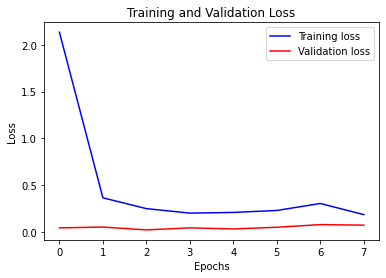

In [41]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
visualize_loss(history, "Training and Validation Loss")

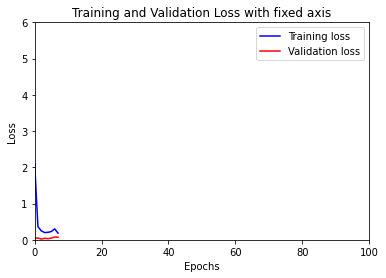

In [42]:
def visualize_loss_fixed_axis(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.axis([0, 100, 0, 6])
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show() 
    
visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

### Prediction

In [43]:
#x_test = test_data.iloc[:1424][[i for i in range(7)]]
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

In [44]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

In [45]:
def re_normalize(data, train_split,y):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean[0])
    print(data_std[0])
    return y * data_std[0] + data_mean[0]


In [46]:
features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 
print(y_hat.size)
y_data = pd.DataFrame(y_hat)
print(y_data)

1287.0
1722.249765660936
27
              0
0   1073.673340
1   1061.771118
2   1269.845703
3   1313.930542
4   1527.686279
5   1503.096313
6   1251.389282
7   1163.223022
8   1296.479858
9   1506.974976
10  1270.462646
11  1452.834106
12  1379.411743
13  1350.957642
14  1080.509521
15  1210.572266
16  1348.437012
17  1431.672363
18  1641.475464
19  1466.334595
20  1434.233765
21  1284.685913
22  1310.184326
23  1468.265259
24  1562.720581
25  1644.734131
26  1616.717529


In [47]:
dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i    
print(dict_index)
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'}) 
print(y_data.size)
result = pd.concat([features, y_data], axis=1, join='outer')
print(result)
print(features)

{0: 268, 1: 269, 2: 270, 3: 271, 4: 272, 5: 273, 6: 274, 7: 275, 8: 276, 9: 277, 10: 278, 11: 279, 12: 280, 13: 281, 14: 282, 15: 283, 16: 284, 17: 285, 18: 286, 19: 287, 20: 288, 21: 289, 22: 290, 23: 291, 24: 292, 25: 293, 26: 294}
27
     NC_it_24h   prediction
0          0.0          NaN
1          0.0          NaN
2          0.0          NaN
3          0.0          NaN
4          0.0          NaN
..         ...          ...
290        NaN  1310.184326
291        NaN  1468.265259
292        NaN  1562.720581
293        NaN  1644.734131
294        NaN  1616.717529

[295 rows x 2 columns]
     NC_it_24h
0            0
1            0
2            0
3            0
4            0
..         ...
264       1391
265       1640
266       1786
267       1912
268       1869

[269 rows x 1 columns]


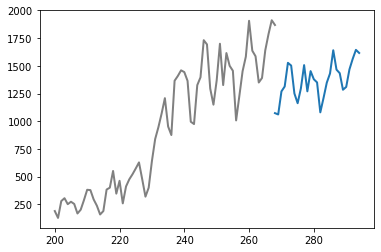

In [48]:
plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.01, Epochs 1000

In [49]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
#print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.01
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
#print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)

sequence_length = int(past / step)
#print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
#print ("start:",val_start, " end:", val_end)

temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

#print("Input shape:", inputs.numpy().shape)
#print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)




[1287.]
[1722.24976566]
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 0.5657
Epoch 00001: val_loss improved from inf to 0.03133, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss: 0.5657 - val_loss: 0.0313
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.0118
Epoch 00002: val_loss improved fro

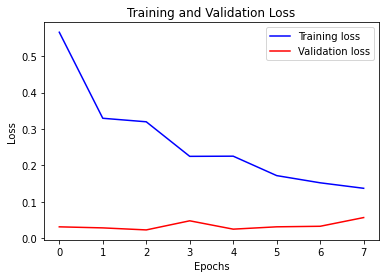

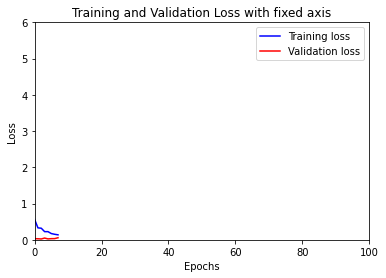

In [50]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


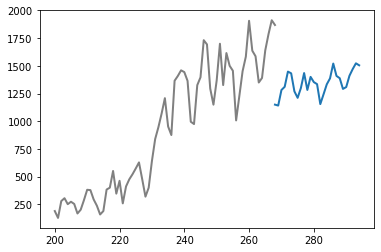

In [51]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.005, Epochs 1000

In [52]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.005
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)




[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 0.8761
Epoch 00001: val_loss improved from inf to 0.04542, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 62ms/step - loss: 0.

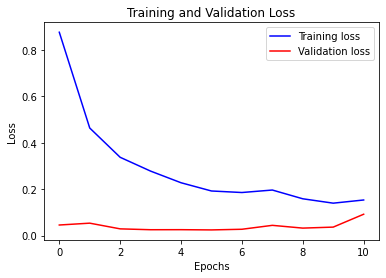

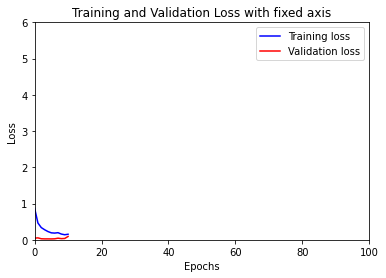

In [53]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


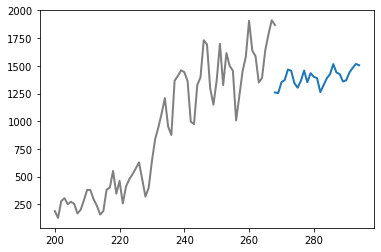

In [54]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.001, Epochs 1000

In [55]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.001
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)




[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 0.9247
Epoch 00001: val_loss improved from inf to 0.07281, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 0.

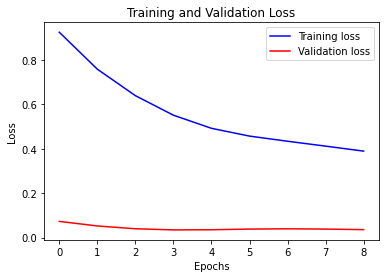

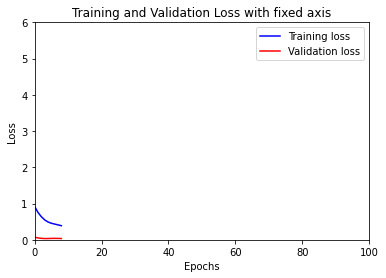

In [56]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


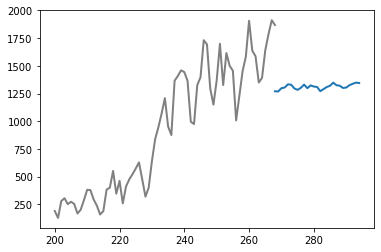

In [57]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0005, Epochs 1000

In [58]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0005
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 1.0186
Epoch 00001: val_loss improved from inf to 0.09451, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss: 1.

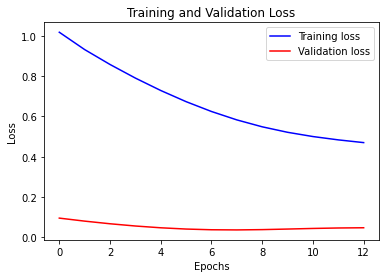

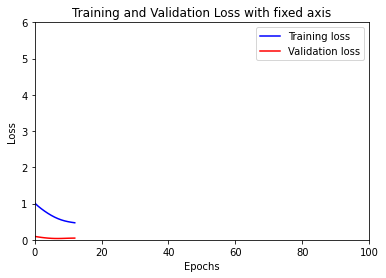

In [59]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


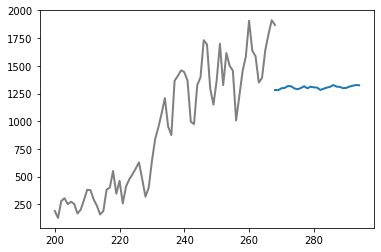

In [60]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0001, Epochs 1000

In [61]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0001
batch_size = 30
epochs = 1000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - ETA: 0s - loss: 0.9471
Epoch 00001: val_loss improved from inf to 0.10934, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 0

Epoch 30/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1589
Epoch 00030: val_loss improved from 0.03985 to 0.03898, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.5498 - val_loss: 0.0390
Epoch 31/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1515
Epoch 00031: val_loss improved from 0.03898 to 0.03824, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.5416 - val_loss: 0.0382
Epoch 32/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1445
Epoch 00032: val_loss improved from 0.03824 to 0.03761, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.5339 - val_loss: 0.0376
Epoch 33/1000
1/6 [====>.........................] - ETA: 0s - loss: 0.1378
Epoch 00033: val_loss improved from 0.03761 to 0.03710, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.5266 - v

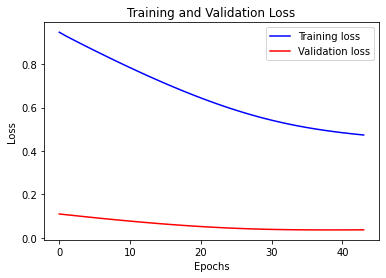

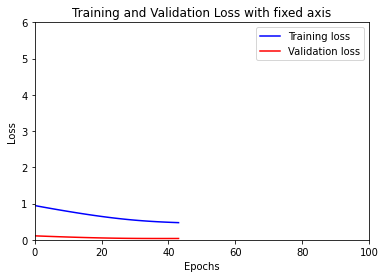

In [62]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


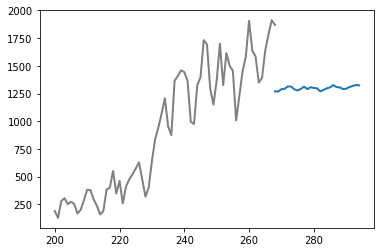

In [63]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.05, Epochs 2000

In [64]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.05
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 2.0436
Epoch 00001: val_loss improved from inf to 0.03506, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 2

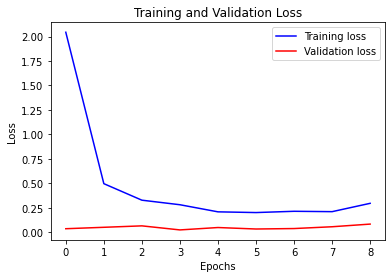

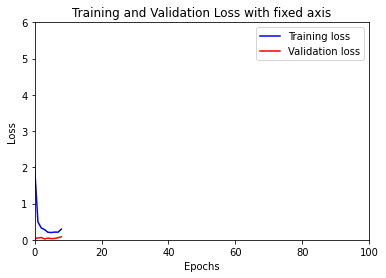

In [65]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


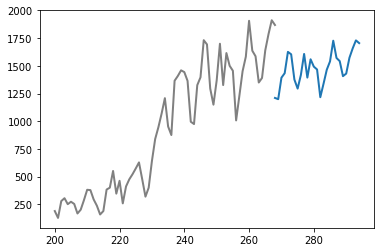

In [66]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.01, Epochs 2000

In [67]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.01
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 0.8593
Epoch 00001: val_loss improved from inf to 0.04267, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss: 0

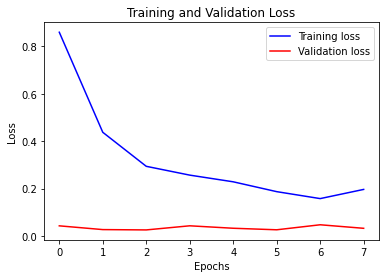

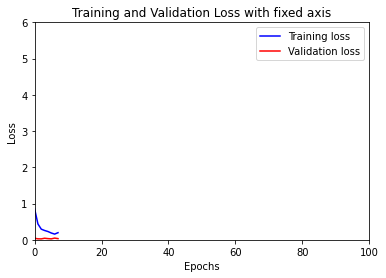

In [68]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


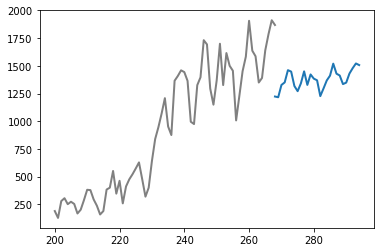

In [69]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.005, Epochs 2000

In [70]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.005
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 25, 1)]           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 0.6137
Epoch 00001: val_loss improved from inf to 0.05345, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 0

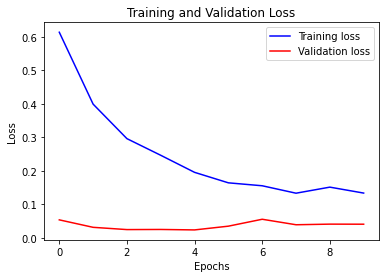

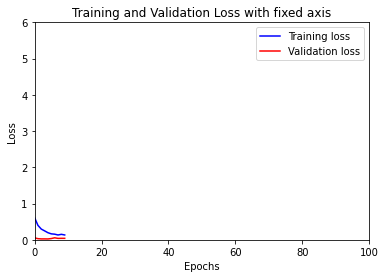

In [71]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


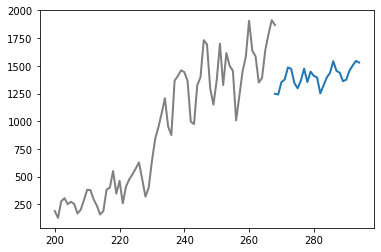

In [72]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.001, Epochs 2000

In [73]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.001
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.1641
Epoch 00001: val_loss improved from inf to 0.09277, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 1

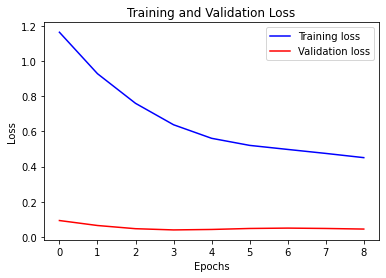

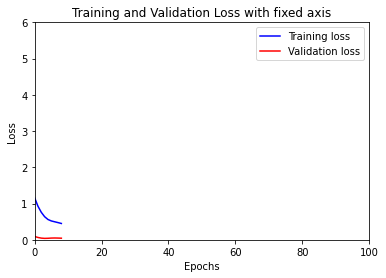

In [74]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


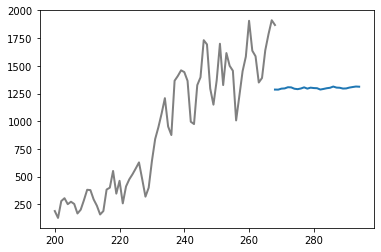

In [75]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0005, Epochs 2000

In [76]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0005
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.1642
Epoch 00001: val_loss improved from inf to 0.12036, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 1

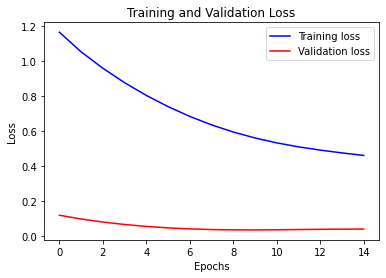

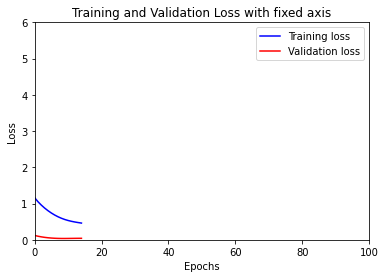

In [77]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


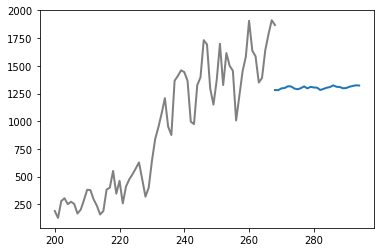

In [78]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0001, Epochs 2000

In [79]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0001
batch_size = 30
epochs = 2000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
6/6 [==============================] - ETA: 0s - loss: 1.1873
Epoch 00001: val_loss improved from inf to 0.14533, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 1

Epoch 30/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.2287
Epoch 00030: val_loss improved from 0.05063 to 0.04903, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.6805 - val_loss: 0.0490
Epoch 31/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.2197
Epoch 00031: val_loss improved from 0.04903 to 0.04755, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.6693 - val_loss: 0.0475
Epoch 32/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.2109
Epoch 00032: val_loss improved from 0.04755 to 0.04619, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.6585 - val_loss: 0.0462
Epoch 33/2000
1/6 [====>.........................] - ETA: 0s - loss: 0.2025
Epoch 00033: val_loss improved from 0.04619 to 0.04496, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.6481 - v

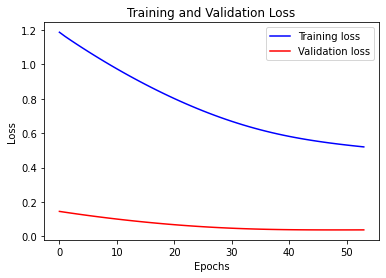

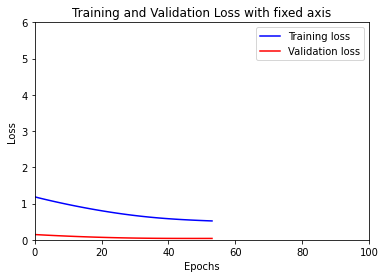

In [80]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


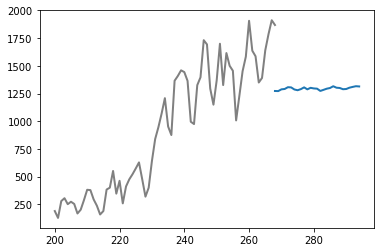

In [81]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.05, Epochs 3000

In [82]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.05
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 0.9250
Epoch 00001: val_loss improved from inf to 0.61624, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss: 0

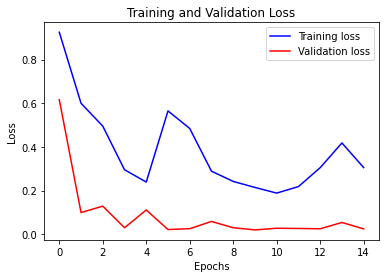

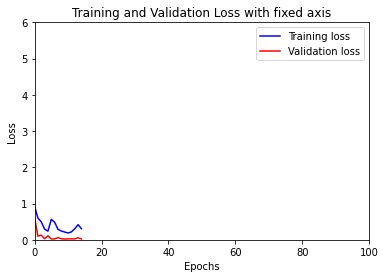

In [83]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


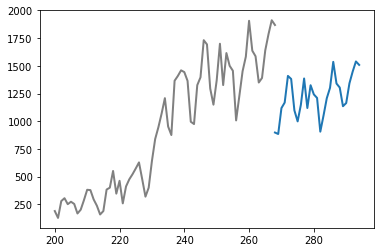

In [84]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.01, Epochs 3000

In [85]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.01
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 0.7078
Epoch 00001: val_loss improved from inf to 0.04776, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 64ms/step - loss: 0

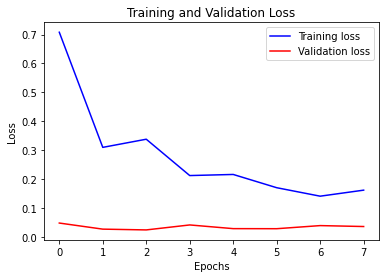

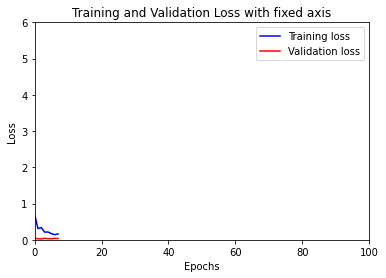

In [86]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


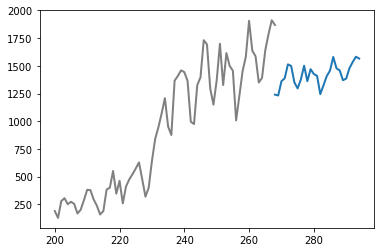

In [87]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.005, Epochs 3000

In [88]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.005
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 0.7778
Epoch 00001: val_loss improved from inf to 0.04137, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 0

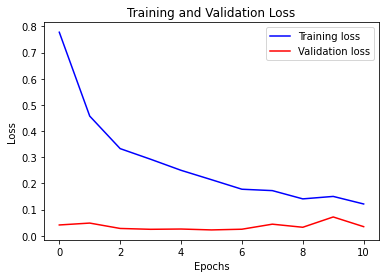

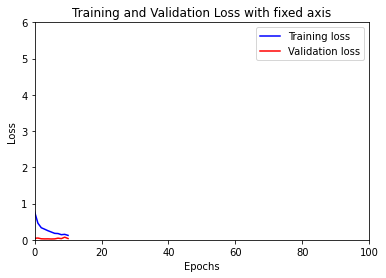

In [89]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


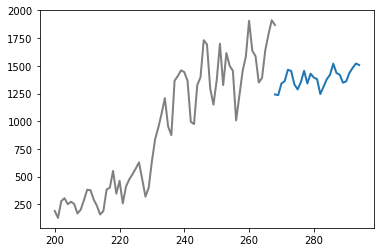

In [90]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.001, Epochs 3000

In [91]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.001
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 0.9133
Epoch 00001: val_loss improved from inf to 0.08190, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 0

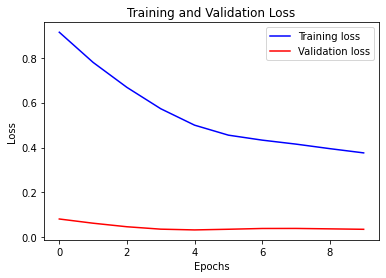

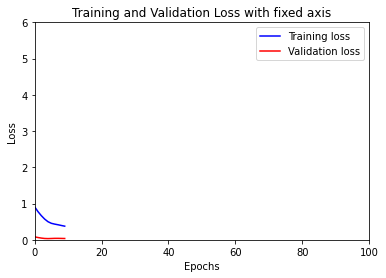

In [92]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


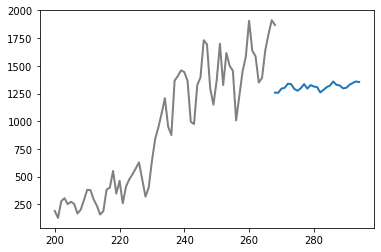

In [93]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0005, Epochs 3000

In [94]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0005
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.0437
Epoch 00001: val_loss improved from inf to 0.09268, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 1

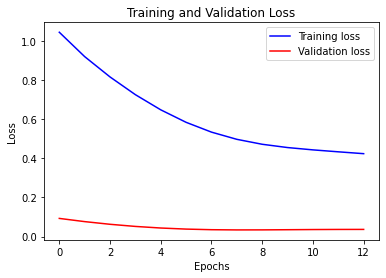

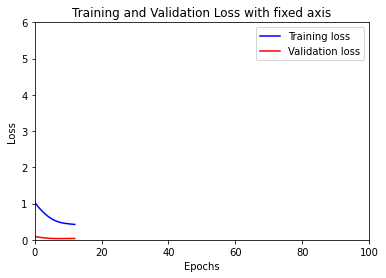

In [95]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


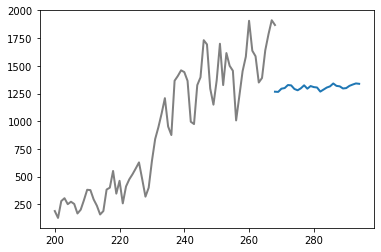

In [96]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')

# LearningRate 0.0001, Epochs 3000

In [97]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]
print("val case until:", int(n*train_fraction), "test case until: ",int(n*test_fraction) )

#test_data

step = 1
past = 25
future = 5
learning_rate = 0.0001
batch_size = 30
epochs = 3000

start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

x_train = train_data[[i for i in range(1)]].values
y_train = features.iloc[start:end][[0]]
sequence_length = int(past / step)


sequence_length = int(past / step)
print(sequence_length)

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

val_start = int(n*train_fraction)
val_end = int(n*test_fraction)

val_label_start = past + future + val_start
val_label_end = past + future + val_end
print ("start:",val_start, " end:", val_end)


temp = val_data[:51]
x_val = temp[[i for i in range(1)]].values
y_val = features.iloc[val_label_start:val_label_end][[0]]

x_val

y_val

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

### model and training

#In this section we will setup our model using LSTM unit.

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


[1287.]
[1722.24976566]
val case until: 188 test case until:  242
start: 30  end: 218
25
start: 188  end: 242
Input shape: (30, 25, 1)
Target shape: (30, 1)
Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 25, 1)]           0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 32)                4352      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3000
6/6 [==============================] - ETA: 0s - loss: 1.7063
Epoch 00001: val_loss improved from inf to 0.23475, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 63ms/step - loss: 1

Epoch 30/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.4935
Epoch 00030: val_loss improved from 0.11282 to 0.10978, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0511 - val_loss: 0.1098
Epoch 31/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.4828
Epoch 00031: val_loss improved from 0.10978 to 0.10681, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0351 - val_loss: 0.1068
Epoch 32/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.4722
Epoch 00032: val_loss improved from 0.10681 to 0.10390, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0194 - val_loss: 0.1039
Epoch 33/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.4617
Epoch 00033: val_loss improved from 0.10390 to 0.10108, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 1.0040 - v

1/6 [====>.........................] - ETA: 0s - loss: 0.2307
Epoch 00062: val_loss improved from 0.05188 to 0.05111, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.6931 - val_loss: 0.0511
Epoch 63/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.2254
Epoch 00063: val_loss improved from 0.05111 to 0.05040, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.6866 - val_loss: 0.0504
Epoch 64/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.2203
Epoch 00064: val_loss improved from 0.05040 to 0.04974, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.6803 - val_loss: 0.0497
Epoch 65/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.2153
Epoch 00065: val_loss improved from 0.04974 to 0.04912, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.6743 - val_loss: 0.049

Epoch 95/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1232
Epoch 00095: val_loss improved from 0.04241 to 0.04236, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.5454 - val_loss: 0.0424
Epoch 96/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1214
Epoch 00096: val_loss improved from 0.04236 to 0.04230, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.5420 - val_loss: 0.0423
Epoch 97/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1196
Epoch 00097: val_loss improved from 0.04230 to 0.04225, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.5385 - val_loss: 0.0422
Epoch 98/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.1179
Epoch 00098: val_loss improved from 0.04225 to 0.04220, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.5351 - v

1/6 [====>.........................] - ETA: 0s - loss: 0.0828
Epoch 00127: val_loss improved from 0.04102 to 0.04097, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.4387 - val_loss: 0.0410
Epoch 128/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0819
Epoch 00128: val_loss improved from 0.04097 to 0.04092, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.4354 - val_loss: 0.0409
Epoch 129/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0810
Epoch 00129: val_loss improved from 0.04092 to 0.04087, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.4320 - val_loss: 0.0409
Epoch 130/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0801
Epoch 00130: val_loss improved from 0.04087 to 0.04082, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.4287 - val_loss: 0.

1/6 [====>.........................] - ETA: 0s - loss: 0.0569
Epoch 00159: val_loss improved from 0.03936 to 0.03931, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.3353 - val_loss: 0.0393
Epoch 160/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0562
Epoch 00160: val_loss improved from 0.03931 to 0.03925, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.3325 - val_loss: 0.0393
Epoch 161/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0555
Epoch 00161: val_loss improved from 0.03925 to 0.03920, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 16ms/step - loss: 0.3298 - val_loss: 0.0392
Epoch 162/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0547
Epoch 00162: val_loss improved from 0.03920 to 0.03914, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.3270 - val_loss: 0.

1/6 [====>.........................] - ETA: 0s - loss: 0.0395
Epoch 00191: val_loss improved from 0.03538 to 0.03515, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.2676 - val_loss: 0.0352
Epoch 192/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0393
Epoch 00192: val_loss improved from 0.03515 to 0.03492, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.2660 - val_loss: 0.0349
Epoch 193/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0390
Epoch 00193: val_loss improved from 0.03492 to 0.03469, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.2645 - val_loss: 0.0347
Epoch 194/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0387
Epoch 00194: val_loss improved from 0.03469 to 0.03445, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.2629 - val_loss: 0.

1/6 [====>.........................] - ETA: 0s - loss: 0.0349
Epoch 00223: val_loss improved from 0.02739 to 0.02719, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.2215 - val_loss: 0.0272
Epoch 224/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0349
Epoch 00224: val_loss improved from 0.02719 to 0.02699, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 17ms/step - loss: 0.2201 - val_loss: 0.0270
Epoch 225/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0348
Epoch 00225: val_loss improved from 0.02699 to 0.02681, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.2188 - val_loss: 0.0268
Epoch 226/3000
1/6 [====>.........................] - ETA: 0s - loss: 0.0348
Epoch 00226: val_loss improved from 0.02681 to 0.02664, saving model to model_checkpoint.h5
6/6 [==============================] - 0s 18ms/step - loss: 0.2174 - val_loss: 0.

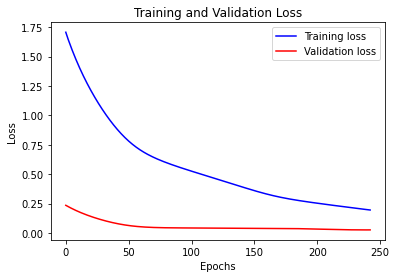

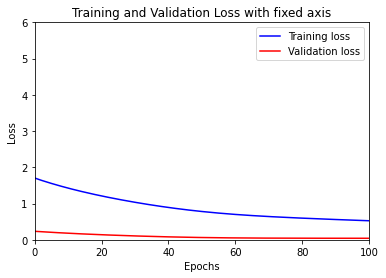

In [98]:
visualize_loss(history, "Training and Validation Loss")

visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

1287.0
1722.249765660936


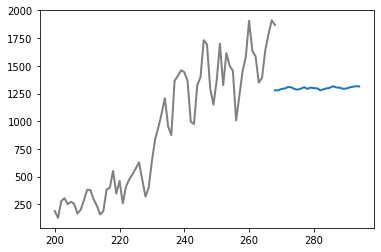

In [99]:
### Prediction
x_test = test_data[[i for i in range(1)]].values
dict_0 = {}
for i in range(27):
    dict_0[i] = 0

y_test = pd.DataFrame({'8':dict_0})

dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=1,
    sampling_rate=step,
    batch_size=27,
)
y_hat = model.predict(dataset_test)

features = all_data_df[selected_features]
y_hat = re_normalize(features.values, train_fraction,y_hat) 

y_data = pd.DataFrame(y_hat)

dict_index = {}
for i in range (27):
    dict_index[i] = 243+25 + i
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'})
result = pd.concat([features, y_data], axis=1, join='outer')

plt.plot( result[200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[200:]['NC_it_24h'], linewidth=2, markersize=12,color='grey')